In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

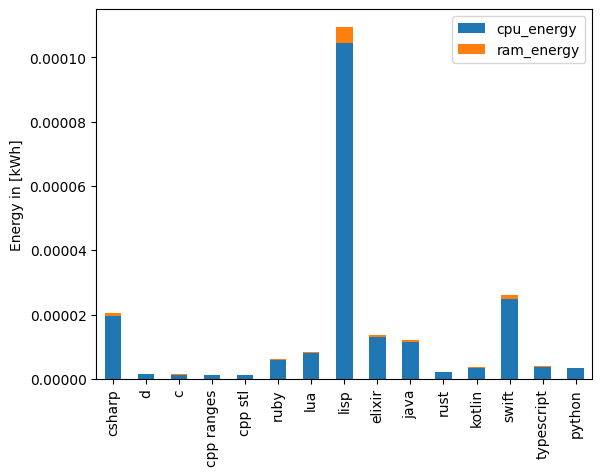

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000020,9.312854e-07
d,0.000002,7.158878e-08
c,0.000001,5.877240e-08
cpp ranges,0.000001,5.412821e-08
cpp stl,0.000001,5.088675e-08
ruby,0.000006,2.782685e-07
lua,0.000008,3.844064e-07
lisp,0.000104,4.986145e-06
elixir,0.000013,6.236969e-07


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000020,9.312854e-07,0.000020
d,0.000002,7.158878e-08,0.000002
c,0.000001,5.877240e-08,0.000001
cpp ranges,0.000001,5.412821e-08,0.000001
cpp stl,0.000001,5.088675e-08,0.000001
ruby,0.000006,2.782685e-07,0.000006
lua,0.000008,3.844064e-07,0.000008
lisp,0.000104,4.986145e-06,0.000109
elixir,0.000013,6.236969e-07,0.000014


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
lisp,0.000104,4.986145e-06,0.000109
swift,0.000025,1.190940e-06,0.000026
csharp,0.000020,9.312854e-07,0.000020
elixir,0.000013,6.236969e-07,0.000014
java,0.000012,5.501846e-07,0.000012
lua,0.000008,3.844064e-07,0.000008
ruby,0.000006,2.782685e-07,0.000006
typescript,0.000004,1.817722e-07,0.000004
kotlin,0.000003,1.641641e-07,0.000004
